In [3]:
import netCDF4 as nc
from metpy.plots import USCOUNTIES
import metpy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import wrf
from wrf import vinterp, to_np, getvar, CoordPair, vertcross, get_cartopy, ll_to_xy, latlon_coords
import pandas as pd
import matplotlib.ticker as ticker
import os
from metpy.units import units 
import metpy.calc as mpcalc
import os

C:\Users\Tony\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
file_path = 'C:\\Users\\Tony\\Desktop\\METR 4990\\7_20_04_30_sbcape_array_3d.npy'
file_path2 = 'C:\\Users\\Tony\\Desktop\\METR 4990\\7_20_04_30_sbcin_array_3d.npy'

cape = np.load(file_path)
cin = np.load(file_path2)

In [3]:
ncfile = nc.Dataset('c:\\Users\\Tony\\Desktop\\wrfoutput\\ctrl\\wrfout_d02_2019-07-20_03_30_00')
z = getvar(ncfile, "z", units="m")
z = z[:20]

start_point = CoordPair(lat=46, lon=-90)
end_point = CoordPair(lat=44.75, lon=-84.5)

lats, lons = latlon_coords(z)

cape_cross = vertcross(cape, z, wrfin=ncfile, start_point=start_point,
                    end_point=end_point, latlon=True, meta=True)

cin_cross = vertcross(cin, z, wrfin=ncfile, start_point=start_point,
                    end_point=end_point, latlon=True, meta=True)

C:\Users\Tony\anaconda3\lib\site-packages\wrf\metadecorators.py:1109: UserWarning: 'latlon' is set to True, but 'field3d' is not of type xarray.DataArray and contains no coordinate information
  warnings.warn("'latlon' is set to True, but 'field3d' is "


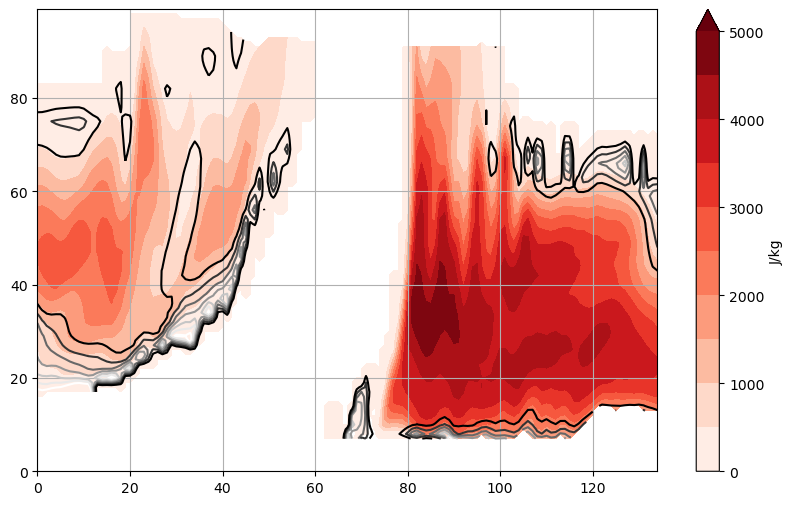

In [4]:
plt.figure(figsize=(10, 6))
plt.contourf(cape_cross, cmap='Reds', levels=np.arange(0, 5001, 500), extend='max')
plt.colorbar(label='J/kg')
#plt.contour(cape_cross, colors='white', levels=np.arange(0, 5001, 500))
plt.contour(cin_cross, levels=np.arange(-400, -50,50), cmap='Greys', hatches=['', '..'])
#plt.xlabel('Distance (km)')
#plt.ylabel('Height (m)')
#plt.title('Vertical Cross-section vitof Reflectiy')
plt.grid(True)
plt.show()

In [11]:
def cape_cin_cross(cape, cin):
    cape = np.load(cape)
    cin = np.load(cin)
    ncfile = nc.Dataset('c:\\Users\\Tony\\Desktop\\wrfoutput\\ctrl\\wrfout_d02_2019-07-20_03_30_00')
    z = getvar(ncfile, "z", units="m")
    z = z[:20]

    start_point = CoordPair(lat=46, lon=-90)
    end_point = CoordPair(lat=44.75, lon=-84.5)

    lats, lons = latlon_coords(z)

    cape_cross = vertcross(cape, z, wrfin=ncfile, start_point=start_point,
                        end_point=end_point, latlon=True, meta=True)

    cin_cross = vertcross(cin, z, wrfin=ncfile, start_point=start_point,
                        end_point=end_point, latlon=True, meta=True)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(cape_cross, cmap='Reds', levels=np.arange(0, 5001, 500), extend='max')
    plt.colorbar(label='J/kg')
    #plt.contour(cape_cross, colors='white', levels=np.arange(0, 5001, 500))
    plt.contour(cin_cross, levels=np.arange(-400, -50,50), cmap='Greys', hatches=['', '..'])
    #plt.xlabel('Distance (km)')
    #plt.ylabel('Height (m)')
    #plt.title('Vertical Cross-section vitof Reflectiy')
    plt.grid(True)
    plt.show()

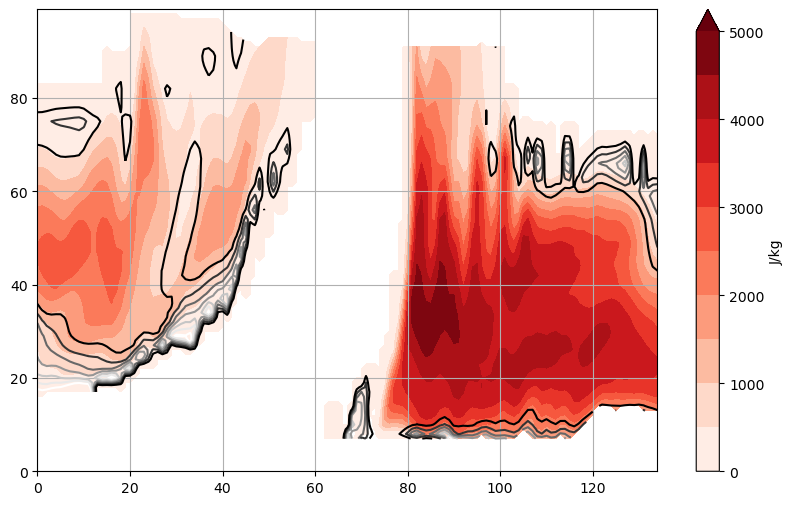

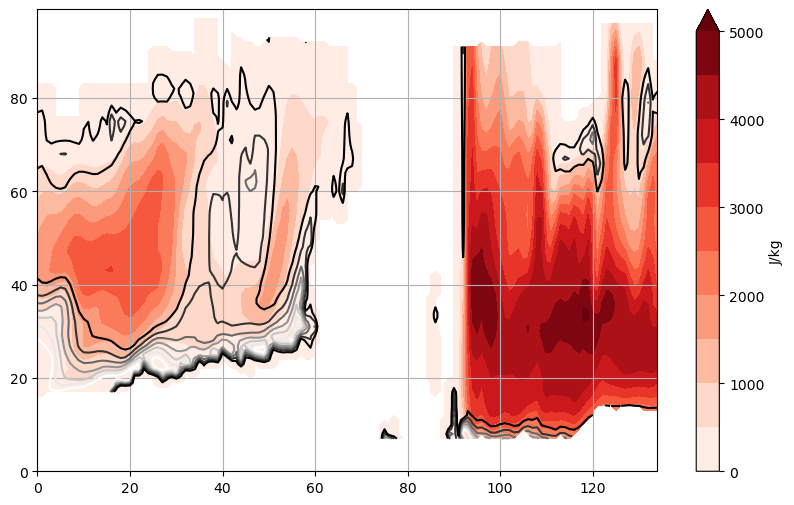

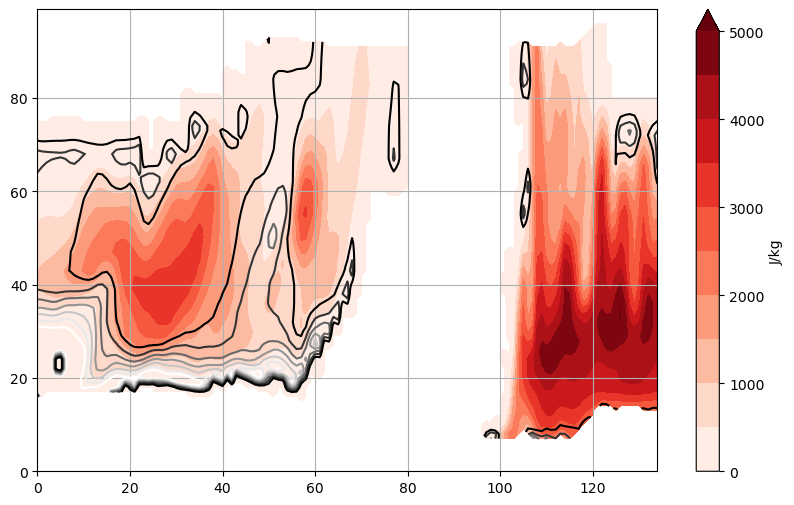

In [12]:
cape_dir = 'C:\\Users\\Tony\\Desktop\\METR 4990\\cape'
cin_dir = "C:\\Users\\Tony\\Desktop\\METR 4990\\cin"

# Get the list of filenames in the cape directory
cape_files = os.listdir(cape_dir)

for filename in cape_files:
    # Construct the full file paths
    cape_file_path = os.path.join(cape_dir, filename)
    
    # Replace 'sbcape' with 'sbcin' in the filename
    cin_filename = filename.replace('sbcape', 'sbcin')
    cin_file_path = os.path.join(cin_dir, cin_filename)

    # Call the function with the file paths
    cape_cin_cross(cape_file_path, cin_file_path)